In [7]:
import maup
import geopandas as gpd
import matplotlib.pyplot as plt
from gerrychain import Graph
import networkx as nx
import pandas as pd

In [8]:
blocks = gpd.read_file("./al_2020_gen_2020_blocks/al_2020_gen_2020_blocks.shp")


In [9]:
block_pop = gpd.read_file("./al_pl2020_b/al_pl2020_p1_b.shp")


In [43]:
CON = gpd.read_file("./al_cong_adopted_2023/SP_Remedial_Plan_3/SP_Remedial_Plan_3.shp")


In [21]:
CON22 = gpd.read_file("./al_2020_cd/al_pl2020_cd.shp")

In [6]:
blocks.head()

,GEOID20,STATEFP,COUNTYFP,PRECINCTID,VAP_MOD,G20PRERTRU,G20PREDBID,G20PRELJOR,G20PREOWRI,G20USSRTUB,...,G20SACRFRI,G20SACOWR2,G20SCCRWIN,G20SCCOWRI,G20SCCRKEL,G20SCCOWR2,G20PSCRCAV,G20PSCDCAS,G20PSCOWRI,geometry
0,010010201001000,01,001,01001000016,14,5.79,2.56,0.11,0.04,5.68,...,6.09,0.13,6.12,0.11,6.10,0.11,5.66,2.62,0.01,"POLYGON ((-86.48558 32.47074, -86.48456 32.471..."
1,010010201001001,01,001,01001000016,26,10.75,4.76,0.20,0.07,10.54,...,11.32,0.23,11.36,0.21,11.32,0.21,10.51,4.86,0.03,"POLYGON ((-86.48644 32.47090, -86.48572 32.470..."
2,010010201001002,01,001,01001000016,27,11.17,4.95,0.21,0.07,10.95,...,11.75,0.24,11.79,0.21,11.76,0.22,10.92,5.05,0.03,"POLYGON ((-86.49551 32.47404, -86.49478 32.473..."
3,010010201001003,01,001,01001000016,16,6.62,2.93,0.12,0.04,6.49,...,6.96,0.14,6.99,0.13,6.97,0.13,6.47,2.99,0.02,"POLYGON ((-86.51038 32.47225, -86.51031 32.472..."
4,010010201001004,01,001,01001000016,0,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"POLYGON ((-86.50189 32.46813, -86.50158 32.468..."


In [7]:
block_pop.head()

,GEOID20,SUMLEV,LOGRECNO,GEOID,COUNTY,P0010001,P0010002,P0010003,P0010004,P0010005,...,P0010063,P0010064,P0010065,P0010066,P0010067,P0010068,P0010069,P0010070,P0010071,geometry
0,011339655012007,750,0253832,7500000US011339655012007,133,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"POLYGON ((-87.14579 34.26117, -87.14563 34.261..."
1,011339657003025,750,0254515,7500000US011339657003025,133,15,13,12,0,0,...,0,0,0,0,0,0,0,0,0,"POLYGON ((-87.62818 34.24378, -87.62790 34.243..."
2,011339656011006,750,0254104,7500000US011339656011006,133,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"POLYGON ((-87.30004 34.04209, -87.30001 34.042..."
3,011339659002065,750,0255012,7500000US011339659002065,133,7,7,7,0,0,...,0,0,0,0,0,0,0,0,0,"POLYGON ((-87.46229 34.01465, -87.46224 34.014..."
4,010630601022001,750,0133894,7500000US010630601022001,063,7,5,0,5,0,...,0,0,0,0,0,0,0,0,0,"POLYGON ((-87.85229 32.85719, -87.85213 32.859..."


In [35]:
dict(block_pop[['GEOID20','P0010001']].set_index('GEOID20'))

{'P0010001': GEOID20
 160779602005012      0
 160050019001074      9
 160059818001046      0
 160050016032033    334
 160050006001030     36
                   ... 
 160199705032014      0
 160199713011031     39
 160199711004038     32
 160199710003010     36
 160199704021032     80
 Name: P0010001, Length: 81879, dtype: int64}

In [44]:
#blocks['population'] = blocks['GEOID20'].map(block_pop[['GEOID20','P0010001']].set_index('GEOID20'))
blocks_w_pop = blocks.merge(block_pop[['GEOID20','P0010001','P0010003','P0010004']].set_index('GEOID20'),on="GEOID20")

In [34]:
blocks_w_pop2 = blocks.merge(block_pop[['GEOID20','P0010001','P0010003','P0010004']].set_index('GEOID20'),on="GEOID20")

In [45]:
blocks_w_pop['population'] = blocks_w_pop['P0010001']
blocks_w_pop.head()

,GEOID20,STATEFP,COUNTYFP,PRECINCTID,VAP_MOD,G20PRERTRU,G20PREDBID,G20PRELJOR,G20PREOWRI,G20USSRTUB,...,G20SCCRKEL,G20SCCOWR2,G20PSCRCAV,G20PSCDCAS,G20PSCOWRI,geometry,P0010001,P0010003,P0010004,population
0,010010201001000,01,001,01001000016,14,5.79,2.56,0.11,0.04,5.68,...,6.10,0.11,5.66,2.62,0.01,"POLYGON ((-86.48558 32.47074, -86.48456 32.471...",21,12,4,21
1,010010201001001,01,001,01001000016,26,10.75,4.76,0.20,0.07,10.54,...,11.32,0.21,10.51,4.86,0.03,"POLYGON ((-86.48644 32.47090, -86.48572 32.470...",34,18,11,34
2,010010201001002,01,001,01001000016,27,11.17,4.95,0.21,0.07,10.95,...,11.76,0.22,10.92,5.05,0.03,"POLYGON ((-86.49551 32.47404, -86.49478 32.473...",29,24,2,29
3,010010201001003,01,001,01001000016,16,6.62,2.93,0.12,0.04,6.49,...,6.97,0.13,6.47,2.99,0.02,"POLYGON ((-86.51038 32.47225, -86.51031 32.472...",17,16,0,17
4,010010201001004,01,001,01001000016,0,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,"POLYGON ((-86.50189 32.46813, -86.50158 32.468...",0,0,0,0


In [46]:
blocks_w_pop['population'].sum()

5024279

In [47]:
bk_to_con = maup.assign(blocks_w_pop,CON)


/Users/ppeaungvongpakdy/opt/anaconda3/lib/python3.9/site-packages/maup/indexed_geometries.py:17: ShapelyDeprecationWarning: STRtree will be changed in 2.0.0 and will not be compatible with versions < 2.
  self.spatial_index = STRtree(self.geometries)
/Users/ppeaungvongpakdy/opt/anaconda3/lib/python3.9/site-packages/maup/indexed_geometries.py:17: ShapelyDeprecationWarning: STRtree will be changed in 2.0.0 and will not be compatible with versions < 2.
  self.spatial_index = STRtree(self.geometries)
/Users/ppeaungvongpakdy/opt/anaconda3/lib/python3.9/site-packages/maup/intersections.py:42: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geometries = geometries[geometries.area > area_cutoff]
/Users/ppeaungvongpakdy/opt/anaconda3/lib/python3.9/site-packages/maup/assign.py:37: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorr

In [22]:
## for the congressional districts in 22 b4 allen v. milligan 
bk_to_con22 = maup.assign(blocks_w_pop, CON22)

/Users/ppeaungvongpakdy/opt/anaconda3/lib/python3.9/site-packages/maup/indexed_geometries.py:17: ShapelyDeprecationWarning: STRtree will be changed in 2.0.0 and will not be compatible with versions < 2.
  self.spatial_index = STRtree(self.geometries)


In [48]:
blocks_w_pop["CON"] = bk_to_con
#blocks_w_pop2["CON22"] = bk_to_con22

(-88.65247604999999, -84.70899695, 29.901244849999998, 35.25120815)

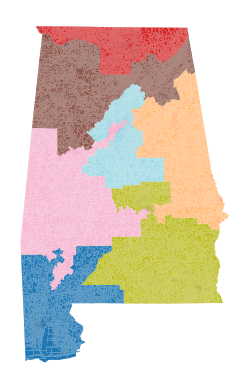

In [36]:
blocks_w_pop2.plot(column="CON22",cmap='tab20')
plt.axis('off')

(-88.65247604999999, -84.70899695, 29.901244849999998, 35.25120815)

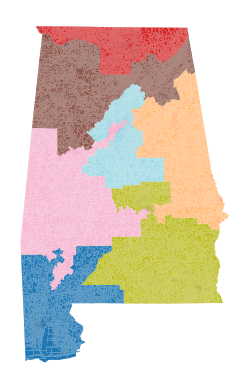

In [24]:
blocks_w_pop.plot(column="CON22",cmap='tab20')
plt.axis('off')

In [49]:
precincts_w_pop = blocks_w_pop.dissolve(by="PRECINCTID")

In [37]:
precincts_w_pop2 = blocks_w_pop.dissolve(by="PRECINCTID")

In [50]:
pc_to_con = maup.assign(precincts_w_pop,CON)
pc_to_con22 = maup.assign(precincts_w_pop, CON22)

precincts_w_pop["CON"] = pc_to_con
precincts_w_pop["CON22"] = pc_to_con22

/Users/ppeaungvongpakdy/opt/anaconda3/lib/python3.9/site-packages/maup/indexed_geometries.py:16: ShapelyDeprecationWarning: Setting custom attributes on geometry objects is deprecated, and will raise an AttributeError in Shapely 2.0
  geometry.index = i
/Users/ppeaungvongpakdy/opt/anaconda3/lib/python3.9/site-packages/maup/indexed_geometries.py:17: ShapelyDeprecationWarning: STRtree will be changed in 2.0.0 and will not be compatible with versions < 2.
  self.spatial_index = STRtree(self.geometries)
/Users/ppeaungvongpakdy/opt/anaconda3/lib/python3.9/site-packages/maup/indexed_geometries.py:17: ShapelyDeprecationWarning: STRtree will be changed in 2.0.0 and will not be compatible with versions < 2.
  self.spatial_index = STRtree(self.geometries)
/Users/ppeaungvongpakdy/opt/anaconda3/lib/python3.9/site-packages/maup/intersections.py:42: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected

In [38]:
pc_to_con22 = maup.assign(precincts_w_pop2, CON22)
precincts_w_pop2["CON22"] = pc_to_con22

/Users/ppeaungvongpakdy/opt/anaconda3/lib/python3.9/site-packages/maup/indexed_geometries.py:16: ShapelyDeprecationWarning: Setting custom attributes on geometry objects is deprecated, and will raise an AttributeError in Shapely 2.0
  geometry.index = i
/Users/ppeaungvongpakdy/opt/anaconda3/lib/python3.9/site-packages/maup/indexed_geometries.py:17: ShapelyDeprecationWarning: STRtree will be changed in 2.0.0 and will not be compatible with versions < 2.
  self.spatial_index = STRtree(self.geometries)
/Users/ppeaungvongpakdy/opt/anaconda3/lib/python3.9/site-packages/maup/indexed_geometries.py:17: ShapelyDeprecationWarning: STRtree will be changed in 2.0.0 and will not be compatible with versions < 2.
  self.spatial_index = STRtree(self.geometries)
/Users/ppeaungvongpakdy/opt/anaconda3/lib/python3.9/site-packages/maup/intersections.py:42: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected

(-88.65247604999999, -84.70899695, 29.901244849999998, 35.25120815)

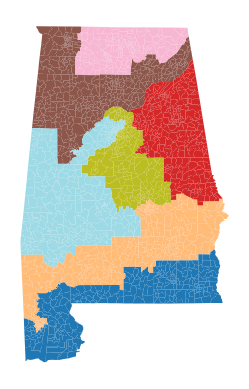

In [51]:
precincts_w_pop.plot(column="CON",cmap='tab20')
plt.axis('off')

(-88.65247604999999, -84.70899695, 29.901244849999998, 35.25120815)

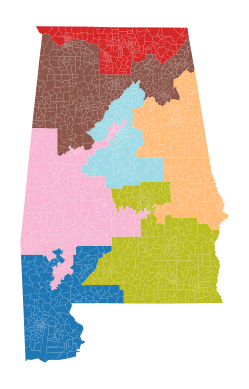

In [39]:
precincts_w_pop2.plot(column="CON22",cmap='tab20')
plt.axis('off')

(-88.65247604999999, -84.70899695, 29.901244849999998, 35.25120815)

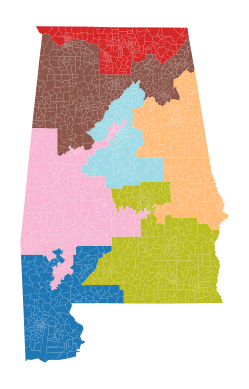

In [27]:
precincts_w_pop.plot(column="CON22",cmap='tab20')
plt.axis('off')

(-88.65247604999999, -84.70899695, 29.901244849999998, 35.25120815)

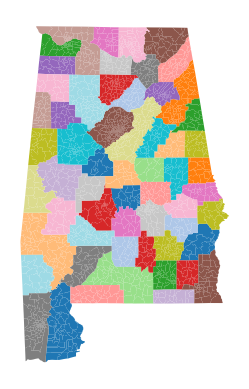

In [52]:
precincts_w_pop.plot(column="COUNTYFP",cmap='tab20')
plt.axis('off')

(-88.65247604999999, -84.70899695, 29.901244849999998, 35.25120815)

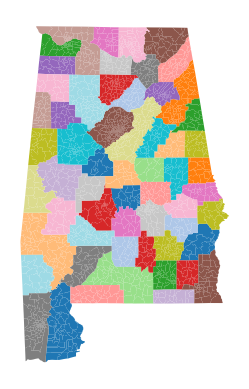

In [40]:
precincts_w_pop2.plot(column="COUNTYFP",cmap='tab20')
plt.axis('off')

In [53]:
precincts_w_pop['C_X'] = precincts_w_pop.centroid.x
precincts_w_pop['C_Y'] = precincts_w_pop.centroid.y
blocks_w_pop['C_X'] = blocks_w_pop.centroid.x
blocks_w_pop['C_Y'] = blocks_w_pop.centroid.y

/var/folders/zq/b4zqkgnx0tqg2gf50102rdyh0000gn/T/ipykernel_32950/603903982.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  precincts_w_pop['C_X'] = precincts_w_pop.centroid.x
/var/folders/zq/b4zqkgnx0tqg2gf50102rdyh0000gn/T/ipykernel_32950/603903982.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  precincts_w_pop['C_Y'] = precincts_w_pop.centroid.y
/var/folders/zq/b4zqkgnx0tqg2gf50102rdyh0000gn/T/ipykernel_32950/603903982.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  blocks_w_pop['C_X'] = blocks_w_pop.centroid.x
/var/folders/zq/b4zqkgnx0tqg2gf50102rdyh0000gn

In [41]:
precincts_w_pop2['C_X'] = precincts_w_pop2.centroid.x
precincts_w_pop2['C_Y'] = precincts_w_pop2.centroid.y
blocks_w_pop2['C_X'] = blocks_w_pop2.centroid.x
blocks_w_pop2['C_Y'] = blocks_w_pop2.centroid.y

/var/folders/zq/b4zqkgnx0tqg2gf50102rdyh0000gn/T/ipykernel_32950/3174275103.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  precincts_w_pop2['C_X'] = precincts_w_pop2.centroid.x
/var/folders/zq/b4zqkgnx0tqg2gf50102rdyh0000gn/T/ipykernel_32950/3174275103.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  precincts_w_pop2['C_Y'] = precincts_w_pop2.centroid.y
/var/folders/zq/b4zqkgnx0tqg2gf50102rdyh0000gn/T/ipykernel_32950/3174275103.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  blocks_w_pop2['C_X'] = blocks_w_pop2.centroid.x
/var/folders/zq/b4zqkgnx0tqg2gf50102r

In [54]:
block_graph = Graph.from_geodataframe(blocks_w_pop)

/Users/ppeaungvongpakdy/opt/anaconda3/lib/python3.9/site-packages/gerrychain/graph/adjacency.py:21: ShapelyDeprecationWarning: STRtree will be changed in 2.0.0 and will not be compatible with versions < 2.
  tree = STRtree(geometries)


TypeError: Cannot index by location index with a non-integer key

In [42]:
block_graph2 = Graph.from_geodataframe(blocks_w_pop2)

/Users/ppeaungvongpakdy/opt/anaconda3/lib/python3.9/site-packages/gerrychain/graph/adjacency.py:21: ShapelyDeprecationWarning: STRtree will be changed in 2.0.0 and will not be compatible with versions < 2.
  tree = STRtree(geometries)


TypeError: Cannot index by location index with a non-integer key

In [33]:
blocks_w_pop.to_file("AL_Processed_Blocks_2.shp")

In [28]:
block_graph.to_json("AL_Processed_Blocks.json")

In [74]:
list(precincts_w_pop.columns)

['geometry',
 'GEOID20',
 'STATEFP',
 'COUNTYFP',
 'VAP_MOD',
 'G20PRERTRU',
 'G20PREDBID',
 'G20PRELJOR',
 'G20PREIWES',
 'G20PREIPIE',
 'G20PREIBLA',
 'G20PREIFUE',
 'G20USSRRIS',
 'G20USSDJOR',
 'G20USSIFLE',
 'G20USSCWRI',
 'population',
 'P0010001',
 'CON',
 'SLD',
 'C_X',
 'C_Y']

In [59]:
precincts_w_right_pop2 = precincts_w_pop2[['geometry',
 'GEOID20',
 'STATEFP',
 'COUNTYFP',
 'VAP_MOD', 'CON22',
 'C_X',
 'C_Y']].merge(blocks_w_pop.groupby("PRECINCTID")[['population','G20PRERTRU','G20PREDBID','P0010003','P0010004']].sum(),on="PRECINCTID")

In [60]:
precincts_w_right_pop2.head()

,geometry,GEOID20,STATEFP,COUNTYFP,VAP_MOD,CON22,C_X,C_Y,population,G20PRERTRU,G20PREDBID,P0010003,P0010004
PRECINCTID,,,,,,,,,,,,,
01001000001,"POLYGON ((-86.90579 32.54010, -86.90544 32.540...",010010210001000,01,001,11,5,-86.843319,32.592397,795,248.99,182.95,465,285
01001000002,"POLYGON ((-86.43811 32.44721, -86.43848 32.447...",010010204004000,01,001,122,5,-86.425494,32.449116,4857,1857.01,534.99,3703,656
01001000003,"POLYGON ((-86.72484 32.61413, -86.72558 32.614...",010010210002004,01,001,0,5,-86.688862,32.653344,1008,465.04,65.00,905,67
01001000004,"POLYGON ((-86.43646 32.48169, -86.43644 32.481...",010010205021000,01,001,254,5,-86.434483,32.498435,10255,2568.00,1214.07,6509,2312
01001000005,"POLYGON ((-86.65952 32.59968, -86.65963 32.599...",010010209021001,01,001,17,5,-86.595289,32.649667,1192,464.00,173.97,886,242


In [61]:
precincts_w_right_pop2['population'].sum()

5024279

In [63]:
precinct_graph = Graph.from_geodataframe(precincts_w_right_pop2)


precincts_w_right_pop2.to_file("AL_Processed_Precincts2.shp")

precinct_graph.to_json("AL_Processed_Precincts2.json")


TypeError: int() argument must be a string, a bytes-like object or a number, not 'Polygon'